__What text reviews say about genre? Are readers positive, negative or neutral towards genre?__

In [1]:
import pandas as pd
import re
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

__Comics and Graphics__

__metadata and book review datasets__

In [2]:
review_comics = pd.read_json('books_review_comics_final.json')
books_metadata_comics = pd.read_json('books_metadata_comics.json')

In [3]:
review_comics.head()

,index,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,n_votes,n_comments
0,0,dc3763cdb9b2cae805882878eebb6a32,18471619,66b2ba840f9bd36d6d27f46136fe4772,3,Sherlock Holmes and the Vampires of London \n ...,Thu Dec 05 10:44:25 -0800 2013,Thu Dec 05 10:45:15 -0800 2013,Tue Nov 05 00:00:00 -0800 2013,0,0
1,1,bafc2d50014200cda7cb2b6acd60cd73,6315584,72f1229aba5a88f9e72f0dcdc007dd22,4,"I've never really liked Spider-Man. I am, howe...",Wed Aug 10 06:06:48 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,0,0
2,3,bafc2d50014200cda7cb2b6acd60cd73,18454118,c3cc5a3e1d6b6c9cf1c044f306c8e752,5,I've been waiting so long for this. I first st...,Mon Mar 03 17:45:56 -0800 2014,Mon Mar 03 17:54:11 -0800 2014,Sat Mar 01 00:00:00 -0800 2014,1,0
3,4,bafc2d50014200cda7cb2b6acd60cd73,2239435,cc444be37ab0a42bfb4dd818cb5edd10,4,The only thing more entertaining than this boo...,Wed Apr 03 12:37:48 -0700 2013,Wed Apr 03 13:03:36 -0700 2013,Wed Apr 03 13:03:36 -0700 2013,0,0
4,6,bafc2d50014200cda7cb2b6acd60cd73,13526176,68267ebf90e2da0d96a3d6aefb5b8ac7,3,This wasn't my favourite Black Butler book. I ...,Thu Nov 15 13:28:38 -0800 2012,Thu Nov 15 13:32:17 -0800 2012,Thu Nov 15 13:32:17 -0800 2012,0,0


In [4]:
review_comics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330052 entries, 0 to 330051
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         330052 non-null  int64 
 1   user_id       330052 non-null  object
 2   book_id       330052 non-null  int64 
 3   review_id     330052 non-null  object
 4   rating        330052 non-null  int64 
 5   review_text   330052 non-null  object
 6   date_added    330052 non-null  object
 7   date_updated  330052 non-null  object
 8   read_at       330052 non-null  object
 9   n_votes       330052 non-null  int64 
 10  n_comments    330052 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 30.2+ MB


__two columns extracted__
* book_id
* review_text

In [3]:
review_texts = review_comics[['book_id','review_text']]

__50 text reviews__

In [5]:
review_texts['review_text'][:50]

0     Sherlock Holmes and the Vampires of London \n ...
1     I've never really liked Spider-Man. I am, howe...
2     I've been waiting so long for this. I first st...
3     The only thing more entertaining than this boo...
4     This wasn't my favourite Black Butler book. I ...
5     Somehow I'd missed this one when reading every...
6     More tears than laughter in this one. I'm both...
7     I checked this out of the library as their Val...
8     I got this in my Book Riot Horror Box and devo...
9     One of our book club babes (Lauren? Ashley?) m...
10    Tierno, comico y hermoso :) Un excelente regal...
11    Las ilustraciones y las pequenas historias, so...
12    Libro perfecto para ninos. Hermoso si te gusta...
13                      !Fascinante de principio a fin!
14    Written as a collection of graphic essays by v...
15    Read this volume on recommendation (trying to ...
16    pretty good overall. i really like the story "...
17    Lots of negative reviews here. I liked thi

__Data cleaning__

In [7]:
def clean_data(df):
    total_time = 0
    start = time.time()
    
    review = pd.DataFrame()
    review['text'] = df['review_text']
    
    #convert text to lower case
    review['text']  = review['text'].str.lower()
    
    #remove punctuations
    #remove all non alphabetic characters
    regex_1 = re.compile(r'[^a-zA-Z]')
    review['text'] = pd.Series(review['text']).str.replace(regex_1, ' ')
    
    #reduce multi-space to single space
    regex_2 = re.compile(r' +')
    review['text'] = pd.Series(review['text']).str.replace(regex_2,' ')
   
    stop = time.time()
    duration = stop-start
    total_time = total_time + duration
    time_taken = str(datetime.timedelta(seconds=total_time))    
    print("Time taken/file :",duration)
    print("Total duration :",time_taken)
    
    return review

In [8]:
comics_reviews = clean_data(review_texts)

Time taken/file : 18.526026010513306
Total duration : 0:00:18.526026


In [9]:
comics_reviews.head()

,text
0,sherlock holmes and the vampires of london rel...
1,i ve never really liked spider man i am howeve...
2,i ve been waiting so long for this i first stu...
3,the only thing more entertaining than this boo...
4,this wasn t my favourite black butler book i w...


In [10]:
comics_reviews['book_id'] = review_texts['book_id']

In [11]:
comics_reviews.shape

(330052, 2)

In [12]:
comics_reviews.head()

,text,book_id
0,sherlock holmes and the vampires of london rel...,18471619
1,i ve never really liked spider man i am howeve...,6315584
2,i ve been waiting so long for this i first stu...,18454118
3,the only thing more entertaining than this boo...,2239435
4,this wasn t my favourite black butler book i w...,13526176


__Get all the book ids from metadata__

In [13]:
book_ids = books_metadata_comics['book_id']

In [14]:
book_ids.shape

(23937,)

__get only those clean text that have book_id equal to book_ids__
* where book_ids are the ids from metadata

In [15]:
comics_reviews = comics_reviews.loc[comics_reviews['book_id'].isin(book_ids)]

In [16]:
comics_reviews.shape

(329149, 2)

In [17]:
comics_reviews.head()

,text,book_id
0,sherlock holmes and the vampires of london rel...,18471619
1,i ve never really liked spider man i am howeve...,6315584
2,i ve been waiting so long for this i first stu...,18454118
3,the only thing more entertaining than this boo...,2239435
4,this wasn t my favourite black butler book i w...,13526176


__get publication year for book_id from metadata__

In [18]:
review_result = pd.merge(books_metadata_comics[['book_id','publication_year']], comics_reviews, on='book_id')

In [19]:
review_result.shape

(329149, 3)

__new dataframe ready for algorithm__

In [20]:
review_result.head()

,book_id,publication_year,text
0,13571772,2012,it s an o k story much better than some other ...
1,13571772,2012,a captain america story involving a russian as...
2,13571772,2012,i read this in order to prepare myself for the...
3,707611,1997,action
4,27036536,2016,ennis has written brilliant war stories in the...


# Sentiment analysis: vader

In [21]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/uni/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

__initialize__

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

__calculate the sentiment scores__

In [23]:
review_result['scores'] = review_result['text'].apply(lambda text: sid.polarity_scores(text))

__separate the scores in the different columns__

In [24]:
review_result['compound'] = review_result['scores'].apply(lambda sc_dict: sc_dict['compound'])

In [25]:
review_result['neg'] = review_result['scores'].apply(lambda sc_dict: sc_dict['neg'])
review_result['neu'] = review_result['scores'].apply(lambda sc_dict: sc_dict['neu'])
review_result['pos'] = review_result['scores'].apply(lambda sc_dict: sc_dict['pos'])

__Scores separated in different columns__

In [26]:
review_result.head()

,book_id,publication_year,text,scores,compound,neg,neu,pos
0,13571772,2012,it s an o k story much better than some other ...,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.7514,0.000,0.871,0.129
1,13571772,2012,a captain america story involving a russian as...,"{'neg': 0.032, 'neu': 0.902, 'pos': 0.066, 'co...",0.7002,0.032,0.902,0.066
2,13571772,2012,i read this in order to prepare myself for the...,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.9535,0.000,0.804,0.196
3,707611,1997,action,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000
4,27036536,2016,ennis has written brilliant war stories in the...,"{'neg': 0.104, 'neu': 0.55, 'pos': 0.347, 'com...",0.6956,0.104,0.550,0.347


__pos neu neg sentiment per publication year__

In [37]:
pos_neu_neg = review_result[['publication_year','pos','neu','neg','compound']]

In [38]:
pos_neu_neg.head()

,publication_year,pos,neu,neg,compound
0,2012,0.129,0.871,0.000,0.7514
1,2012,0.066,0.902,0.032,0.7002
2,2012,0.196,0.804,0.000,0.9535
3,1997,0.000,1.000,0.000,0.0000
4,2016,0.347,0.550,0.104,0.6956


In [39]:
pos_neu_neg.shape

(329149, 5)

__calculate standard deviation of each column for each publication year__

In [40]:
std_compound = pos_neu_neg.groupby('publication_year').agg(np.std)
count = pos_neu_neg.groupby('publication_year').agg('count')

In [41]:
std_compound.head()

,pos,neu,neg,compound
publication_year,,,,
1986,0.174752,0.198074,0.123521,0.583991
1987,0.194031,0.222219,0.097969,0.524995
1988,0.206817,0.209279,0.095339,0.547764
1989,0.149840,0.195151,0.104693,0.519097
1990,0.176908,0.190453,0.108737,0.522934


In [42]:
pos_neu_neg = pos_neu_neg.groupby('publication_year').agg('mean')

In [43]:
pos_neu_neg['review_count'] = count['compound']
pos_neu_neg['std_compound'] = std_compound['compound']
pos_neu_neg['std_err'] = pos_neu_neg['std_compound']/np.sqrt(pos_neu_neg['review_count'])

__Finally table with are ready__
* compound value 
* review_count for each publication year
* standard deviation of compound value for each publication year
* standard error of compound values for each publication year

In [44]:
pos_neu_neg.head()

,pos,neu,neg,compound,review_count,std_compound,std_err
publication_year,,,,,,,
1986,0.190792,0.718015,0.079784,0.375856,264,0.583991,0.035942
1987,0.207278,0.717357,0.057762,0.382869,227,0.524995,0.034845
1988,0.195794,0.747070,0.052789,0.403447,228,0.547764,0.036277
1989,0.172579,0.736890,0.071368,0.426977,209,0.519097,0.035907
1990,0.196705,0.728524,0.066894,0.450091,254,0.522934,0.032812


__plot of compound sentiment (used in paper)__

<AxesSubplot:xlabel='publication_year', ylabel='sentiment'>

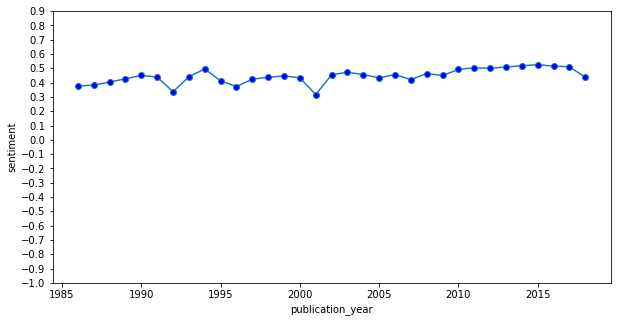

In [86]:
pos_neu_neg['compound'].plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='sentiment', yticks= np.arange(-1,1,step=0.1))

__plot including neg, pos, neu and compund *( not used in paper)__

<AxesSubplot:xlabel='publication_year', ylabel='sentiment'>

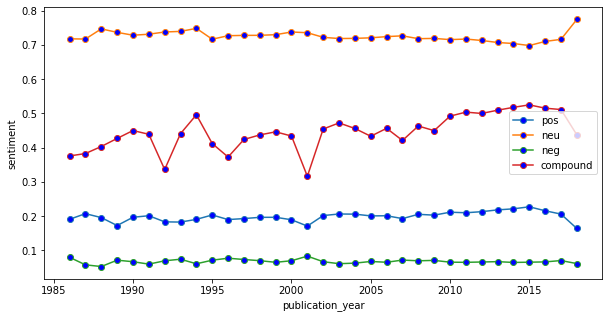

In [46]:
pos_neu_neg_plot = pos_neu_neg[['pos','neu','neg','compound']]
pos_neu_neg_plot.plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='sentiment')

__Error Plot__

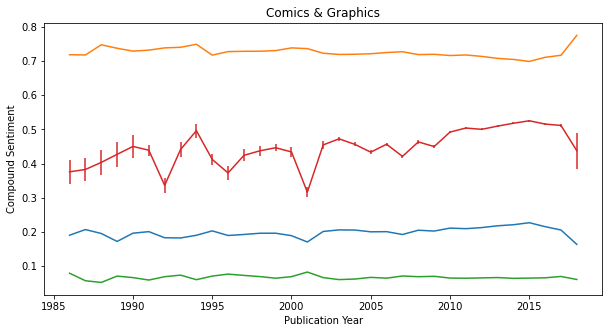

In [47]:
plt.figure(figsize=(10,5))
x = pos_neu_neg.index
y = pos_neu_neg['compound']
yerr = pos_neu_neg['std_err']
plt.plot(pos_neu_neg_plot['pos'])
plt.plot(pos_neu_neg_plot['neu'])
plt.plot(pos_neu_neg_plot['neg'])
plt.errorbar(x,y, yerr=yerr)
plt.title("Comics & Graphics")
plt.ylabel("Compound Sentiment")
plt.xlabel("Publication Year")
plt.show()

__error plot__

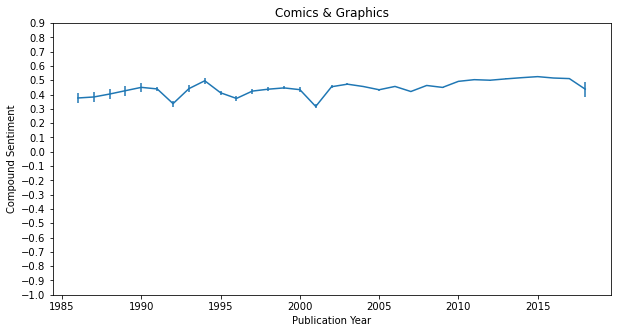

In [87]:
plt.figure(figsize=(10,5))
x = pos_neu_neg.index
y = pos_neu_neg['compound']
yerr = pos_neu_neg['std_err']
plt.errorbar(x,y, yerr=yerr)
plt.yticks(np.arange(-1,1,step=0.1))
plt.title("Comics & Graphics")
plt.ylabel("Compound Sentiment")
plt.xlabel("Publication Year")
plt.show()

__Mystery Thriller and Crime__

In [49]:
!ls

Untitled.rtf                     glove.twitter.27B.200d.txt
books_interactions_final.json    readme.rtf
books_metadata_comics.json       rq1.ipynb
books_metadata_thriller.json     rq2.ipynb
books_review_comics_final.json   rq4.ipynb
books_review_thriller.json       rq5.ipynb
comic_review_classification.json rq6-regression.ipynb
glove.6B.100d.txt


In [6]:
books_metadata_thriller = pd.read_json('books_metadata_thriller.json')
review_thriller = pd.read_json('books_review_thriller.json')

In [7]:
review_thriller.head()

,index,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,n_votes,n_comments
0,1,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,22,0
1,2,8842281e1d1347389f2ab93d60773d4d,32283133,8e4d61801907e591018bdc3442a9cf2b,0,http://www.telegraph.co.uk/culture/10...,Tue Nov 01 11:09:18 -0700 2016,Tue Nov 01 11:09:44 -0700 2016,,9,0
2,3,8842281e1d1347389f2ab93d60773d4d,17860739,022bb6daffa49adc27f6b20b6ebeb37d,4,An amazing and unique creation: JJ Abrams and ...,Wed Mar 26 13:51:30 -0700 2014,Tue Sep 23 01:44:36 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,7,0
3,4,8842281e1d1347389f2ab93d60773d4d,8694005,0e317947e1fd341f573192111bb2921d,3,The Name of the Rose is a thrilling Dan Brown-...,Wed Sep 08 01:22:27 -0700 2010,Wed Dec 14 12:30:43 -0800 2016,Mon Aug 10 00:00:00 -0700 2015,17,6
4,6,8842281e1d1347389f2ab93d60773d4d,2429135,efee7a3f620ed640366226caa7b138f0,5,I haven't stayed up until 5am to finish a book...,Mon Mar 15 14:05:04 -0700 2010,Wed Mar 22 11:46:43 -0700 2017,Sun Mar 28 00:00:00 -0700 2010,13,10


In [8]:
review_thriller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056240 entries, 0 to 1056239
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   index         1056240 non-null  int64 
 1   user_id       1056240 non-null  object
 2   book_id       1056240 non-null  int64 
 3   review_id     1056240 non-null  object
 4   rating        1056240 non-null  int64 
 5   review_text   1056240 non-null  object
 6   date_added    1056240 non-null  object
 7   date_updated  1056240 non-null  object
 8   read_at       1056240 non-null  object
 9   n_votes       1056240 non-null  int64 
 10  n_comments    1056240 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 96.7+ MB


In [9]:
thriller_review_text = review_thriller[['book_id','review_text']]

In [10]:
thriller_review_text.head()

,book_id,review_text
0,28684704,"A fun, fast paced science fiction thriller. I ..."
1,32283133,http://www.telegraph.co.uk/culture/10...
2,17860739,An amazing and unique creation: JJ Abrams and ...
3,8694005,The Name of the Rose is a thrilling Dan Brown-...
4,2429135,I haven't stayed up until 5am to finish a book...


In [12]:
thriller_review_text['review_text'][:50]

0     A fun, fast paced science fiction thriller. I ...
1              http://www.telegraph.co.uk/culture/10...
2     An amazing and unique creation: JJ Abrams and ...
3     The Name of the Rose is a thrilling Dan Brown-...
4     I haven't stayed up until 5am to finish a book...
5     A quick read, but I enjoyed the focus on gener...
6     A quick read, and probably better than The Da ...
7     Only book that the movie had nothing to do wit...
8     One of my favorites from Grisham. The movie wa...
9     I haven't read a good spy novel in a while - a...
10    A classic LA detective novel - loved it. The o...
11    The second volume of the masterful Sherlock Ho...
12                 A great book to read on an airplane.
13    After seeing the movie (i liked it), and needi...
14    I know this book is supposed to be evil as its...
15    I'm a huge james bond fan. Always have been. I...
16    The story begins with a young boy and his frie...
17    I really enjoyed this book! It's fun but n

In [11]:
thriller_reviews = clean_data(thriller_review_text)

NameError: name 'clean_data' is not defined

In [56]:
thriller_reviews.head()

,text
0,a fun fast paced science fiction thriller i re...
1,http www telegraph co uk culture
2,an amazing and unique creation jj abrams and d...
3,the name of the rose is a thrilling dan brown ...
4,i haven t stayed up until am to finish a book ...


In [57]:
thriller_reviews['book_id'] = thriller_review_text['book_id']

In [58]:
thriller_reviews.shape

(1056240, 2)

In [59]:
thriller_reviews.head()

,text,book_id
0,a fun fast paced science fiction thriller i re...,28684704
1,http www telegraph co uk culture,32283133
2,an amazing and unique creation jj abrams and d...,17860739
3,the name of the rose is a thrilling dan brown ...,8694005
4,i haven t stayed up until am to finish a book ...,2429135


In [60]:
thriller_review_result = pd.merge(books_metadata_thriller[['book_id','publication_year']], thriller_reviews, on='book_id')

In [61]:
thriller_review_result.head()

,book_id,publication_year,text
0,16158998,2013,a good solid miss marple mystery after listeni...
1,22722787,2014,jonathan ashley crams a lot into the cost of d...
2,16158996,2013,another excellent miss marple story beautifull...
3,17368265,2013,this review is from an arc i picked up at book...
4,17368265,2013,agent pendergast has become one of my favorite...


# __Sentiment analysis__

In [62]:
thriller_review_result['scores'] = thriller_review_result['text'].apply(lambda text: sid.polarity_scores(text))

In [63]:
thriller_review_result['compound'] = thriller_review_result['scores'].apply(lambda sc_dict: sc_dict['compound'])
thriller_review_result['neg'] = thriller_review_result['scores'].apply(lambda sc_dict: sc_dict['neg'])
thriller_review_result['neu'] = thriller_review_result['scores'].apply(lambda sc_dict: sc_dict['neu'])
thriller_review_result['pos'] = thriller_review_result['scores'].apply(lambda sc_dict: sc_dict['pos'])

In [64]:
thriller_review_result.head()

,book_id,publication_year,text,scores,compound,neg,neu,pos
0,16158998,2013,a good solid miss marple mystery after listeni...,"{'neg': 0.089, 'neu': 0.817, 'pos': 0.095, 'co...",-0.1531,0.089,0.817,0.095
1,22722787,2014,jonathan ashley crams a lot into the cost of d...,"{'neg': 0.162, 'neu': 0.759, 'pos': 0.078, 'co...",-0.9728,0.162,0.759,0.078
2,16158996,2013,another excellent miss marple story beautifull...,"{'neg': 0.123, 'neu': 0.308, 'pos': 0.569, 'co...",0.7783,0.123,0.308,0.569
3,17368265,2013,this review is from an arc i picked up at book...,"{'neg': 0.097, 'neu': 0.756, 'pos': 0.148, 'co...",0.9584,0.097,0.756,0.148
4,17368265,2013,agent pendergast has become one of my favorite...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.8151,0.000,0.791,0.209


__positive neutral and negative sentiment per publication year__

In [65]:
thriller_pos_neu_neg = thriller_review_result[['publication_year','pos','neu','neg','compound']]

In [66]:
thriller_pos_neu_neg.head()

,publication_year,pos,neu,neg,compound
0,2013,0.095,0.817,0.089,-0.1531
1,2014,0.078,0.759,0.162,-0.9728
2,2013,0.569,0.308,0.123,0.7783
3,2013,0.148,0.756,0.097,0.9584
4,2013,0.209,0.791,0.000,0.8151


In [67]:
thriller_pos_neu_neg.shape

(1056240, 5)

In [68]:
std_cmp_crime = thriller_pos_neu_neg.groupby('publication_year').agg(np.std)
count_crime = thriller_pos_neu_neg.groupby('publication_year').agg('count')

In [69]:
thriller_pos_neu_neg = thriller_pos_neu_neg.groupby('publication_year').agg('mean')
thriller_pos_neu_neg.head()

,pos,neu,neg,compound
publication_year,,,,
1946,0.152537,0.758829,0.088488,0.371766
1950,0.131324,0.788691,0.080103,0.357941
1951,0.154098,0.730373,0.095784,0.078912
1952,0.147729,0.769917,0.082375,0.151873
1953,0.157244,0.774077,0.068679,0.273531


In [70]:
thriller_pos_neu_neg['std_cmp_crime'] = std_cmp_crime['compound']
thriller_pos_neu_neg['count_review'] = count_crime['compound']

In [71]:
thriller_pos_neu_neg['std_err'] = thriller_pos_neu_neg['std_cmp_crime']/np.sqrt(thriller_pos_neu_neg['count_review'])

In [72]:
thriller_pos_neu_neg.head()

,pos,neu,neg,compound,std_cmp_crime,count_review,std_err
publication_year,,,,,,,
1946,0.152537,0.758829,0.088488,0.371766,0.743717,41,0.116149
1950,0.131324,0.788691,0.080103,0.357941,0.678755,68,0.082311
1951,0.154098,0.730373,0.095784,0.078912,0.767669,51,0.107495
1952,0.147729,0.769917,0.082375,0.151873,0.664022,48,0.095843
1953,0.157244,0.774077,0.068679,0.273531,0.654772,78,0.074138


<AxesSubplot:xlabel='publication_year', ylabel='sentiment'>

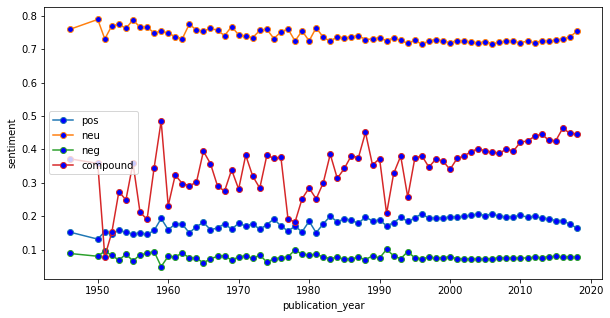

In [73]:
thriller_pos_neu_neg_plot = thriller_pos_neu_neg[['pos','neu','neg','compound']]
thriller_pos_neu_neg_plot.plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='sentiment')

<AxesSubplot:xlabel='publication_year', ylabel='compound sentiment'>

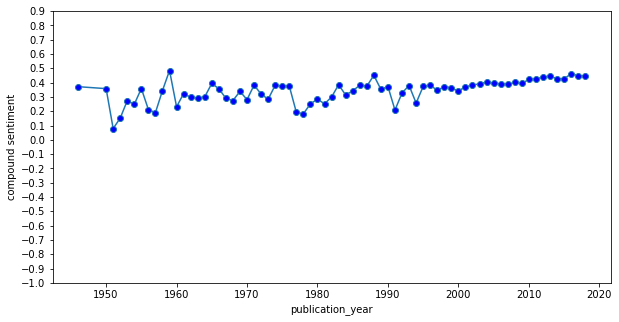

In [89]:
thriller_pos_neu_neg_plot['compound'].plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='compound sentiment', yticks=np.arange(-1,1,step=0.1))

__Error bars__

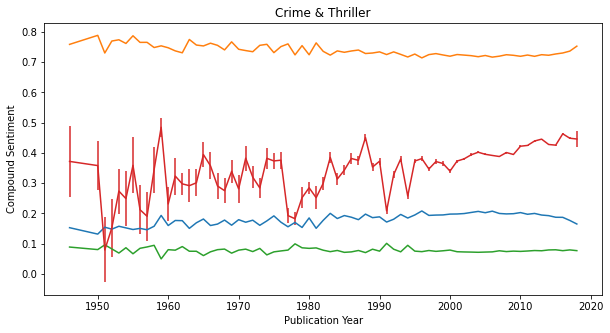

In [75]:
plt.figure(figsize=(10,5))
x = thriller_pos_neu_neg.index
y = thriller_pos_neu_neg['compound']
yerr = thriller_pos_neu_neg['std_err']
plt.plot(thriller_pos_neu_neg['pos'])
plt.plot(thriller_pos_neu_neg['neu'])
plt.plot(thriller_pos_neu_neg['neg'])
plt.errorbar(x,y, yerr=yerr)
plt.title("Crime & Thriller")
plt.ylabel("Compound Sentiment")
plt.xlabel("Publication Year")
plt.show()

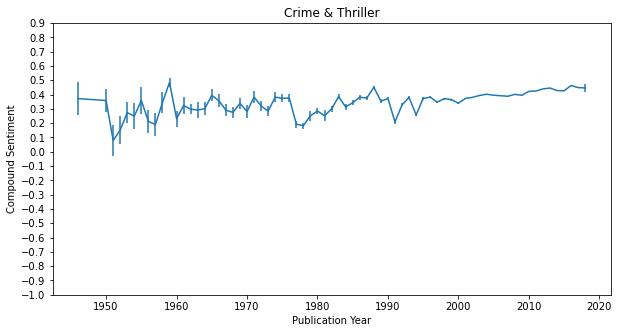

In [90]:
plt.figure(figsize=(10,5))
x = thriller_pos_neu_neg.index
y = thriller_pos_neu_neg['compound']
yerr = thriller_pos_neu_neg['std_err']
plt.errorbar(x,y, yerr=yerr)
plt.yticks(np.arange(-1,1,step=0.1))
plt.title("Crime & Thriller")
plt.ylabel("Compound Sentiment")
plt.xlabel("Publication Year")
plt.show()